# Read iRIC CGNS

ここでは、PythonでiRICのCGNSファイルから計算条件、計算結果を読込む

In [1]:
#必要なライブラリ
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#cgnsファイル名
fname = './Case1.cgn'

In [2]:
f = h5py.File(fname, 'r')

dir_name = 'iRIC/CalculationConditions'
for k in f[dir_name].keys():
    print(k)
    
    dir_name1 = dir_name + '/' + k     
    if f[dir_name1].__contains__('Value'):
        v = f[dir_name1 + '/Value/ data'].value
        print(v)
        
    else:
        print('This is a function.')
        #流量、支川流量
        #混合粒　径粒径階別存在率

        
#ファイルclose
f.close()

a_snu
[1.]
alh
[0.8]
b_snu
[0.]
bh_slope
[0.001]
bheight
[0.03]
c_tree
[0.7]
cse
[100.]
csm
[1.]
diam
[0.55]
discharge_t
This is a function.
discharge_waterlevel
This is a function.
dt
[0.01]
e_d
[0.01]
e_m
[0.01]
e_thick
[0.1]
edition
[0]
h_down
[0.]
h_slope
[0.001]
h_slope_1
[0.001]
h_slope_2
[0.001]
h_slope_t
[0.001]
i_erosion_end
[5]
i_erosion_start
[5]
i_flow
[2]
i_sec_hour
[1]
i_smooth
[5]
i_t1
[0]
i_t2
[0]
j_bank
[0]
j_bedload
[1]
j_cip
[2]
j_collaps
[0]
j_conf
[0]
j_m1
[0]
j_m2
[0]
j_mix
[0]
j_mix_dis
[0]
j_mix_dis_dep
[0]
j_qb_vec
[0]
j_qbqs
[1]
j_qbs
[1]
j_qbup
[0]
j_qsu
[0]
j_sf
[0]
j_slope
[0]
j_smooth
[0]
j_snu
[1]
j_t1
[0]
j_t2
[0]
j_upv
[1]
j_upv_slope
[0]
j_vege
[0]
j_wl
[1]
j_zb
[0]
jop_fb
[0]
jop_fr
[0]
jop_have
[0]
jop_md
[0]
jop_qb
[0]
jop_sc
[0]
jop_sh
[0]
jop_vort
[0]
jop_zave
[0]
jop_zmin
[0]
jrep
[1]
lmax
[10]
mixfile_fr
This is a function.
mixfile_fr_d
This is a function.
mixfile_pp
This is a function.
mixfile_pp_d
This is a function.
n_parallel
[1]
n_tempfile


C:\Users\riverlink\Anaconda3\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [3]:
#格子および格子属性

#ファイルopen
f = h5py.File(fname, 'r')

#計算条件
dir_name = 'iRIC/iRICZone/GridCoordinates'

#格子形状
dir_name = 'iRIC/iRICZone/GridCoordinates'
xx = np.array(f[dir_name + '/CoordinateX/ data'].value)
yy = np.array(f[dir_name + '/CoordinateY/ data'].value)
imax = xx.shape[1]
jmax = xx.shape[0]

print('Grid Information')
print('imax :', str(imax), ', jmax : ', str(jmax))


#格子属性　Nays2DHの場合
dir_name = 'iRIC/iRICZone/GridConditions'

# node values
zz = np.array(f[dir_name + '/Elevation/Value/ data'].value)
zz = zz.reshape([jmax, imax])

zb = np.array(f[dir_name + '/Elevation_zb/Value/ data'].value)
zb = zb.reshape([jmax, imax])


# cell values
fm = np.array(f[dir_name + '/Fix_movable/Value/ data'].value)
fm = fm.reshape([jmax-1, imax-1])

obst = np.array(f[dir_name + '/Obstacle/Value/ data'].value)
obst = obst.reshape([jmax-1, imax-1])

sn = np.array(f[dir_name + '/roughness_cell/Value/ data'].value)
sn = sn.reshape([jmax-1, imax-1])

vege_d = np.array(f[dir_name + '/vege_density/Value/ data'].value)
vege_d = vege_d.reshape([jmax-1, imax-1])

vege_h = np.array(f[dir_name + '/vege_height/Value/ data'].value)  
vege_h = vege_h.reshape([jmax-1, imax-1])

mix = np.array(f[dir_name + '/mix_cell/Value/ data'].value)    
mix = mix.reshape([jmax-1, imax-1])

#ファイルclose
f.close()

Grid Information
imax : 41 , jmax :  17


In [4]:
#計算結果　時刻・流量など

#ファイルopen
f = h5py.File(fname, 'r')

#時刻や流量などスカラー値

#Nays2DHの場合
Tname = 'iRIC/BaseIterativeData/TimeValues'
Qname = 'iRIC/BaseIterativeData/Discharge(m3s-1)' 

#計算結果パスの時刻    
tt = f[Tname +  '/ data'].value
print("Calculation Output Time:")
print(tt)

#計算結果パスの流量    
qq = f[Qname +  '/ data'].value
print("Discharge:")
print(qq)

#ファイルclose
f.close()

Calculation Output Time:
[   0.   60.  120.  180.  240.  300.  360.  420.  480.  540.  600.  660.
  720.  780.  840.  900.  960. 1020. 1080. 1140. 1200. 1260. 1320. 1380.
 1440. 1500. 1560. 1620. 1680. 1740. 1800.]
Discharge:
[0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004]


iRIC/iRICZone/FlowSolution1
iRIC/iRICZone/FlowSolution2
iRIC/iRICZone/FlowSolution3
iRIC/iRICZone/FlowSolution4
iRIC/iRICZone/FlowSolution5
iRIC/iRICZone/FlowSolution6
iRIC/iRICZone/FlowSolution7
iRIC/iRICZone/FlowSolution8
iRIC/iRICZone/FlowSolution9
iRIC/iRICZone/FlowSolution10
iRIC/iRICZone/FlowSolution11
iRIC/iRICZone/FlowSolution12
iRIC/iRICZone/FlowSolution13
iRIC/iRICZone/FlowSolution14
iRIC/iRICZone/FlowSolution15
iRIC/iRICZone/FlowSolution16
iRIC/iRICZone/FlowSolution17
iRIC/iRICZone/FlowSolution18
iRIC/iRICZone/FlowSolution19
iRIC/iRICZone/FlowSolution20
iRIC/iRICZone/FlowSolution21
iRIC/iRICZone/FlowSolution22
iRIC/iRICZone/FlowSolution23
iRIC/iRICZone/FlowSolution24
iRIC/iRICZone/FlowSolution25
iRIC/iRICZone/FlowSolution26
iRIC/iRICZone/FlowSolution27
iRIC/iRICZone/FlowSolution28
iRIC/iRICZone/FlowSolution29
iRIC/iRICZone/FlowSolution30
iRIC/iRICZone/FlowSolution31


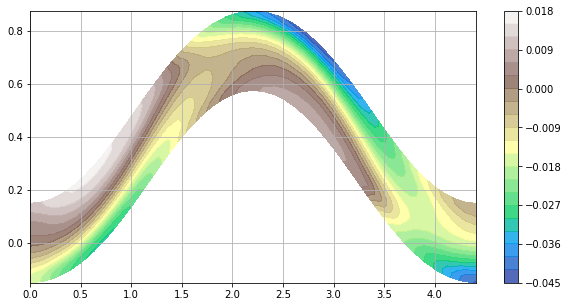

In [5]:
#計算結果　格子・セル・辺・パーティクル・ポリゴン
#ファイルopen
f = h5py.File(fname, 'r')

iRICZone = 'iRIC/iRICZone'

resNode ='FlowSolution'
resCell ='FlowCellSolution'
resParticle = 'PolydataSolution'
resPolygon = 'PolydataSolution'
resEdgeX = 'PolydataSolution'
resEdgeY = 'PolydataSolution'

nlist = []
clist = []
palist = []
polist = []
exlist = []
eylist = []
for k in f[iRICZone].keys():
    
    #node
    if k.startswith(resNode) == True:
        nlist.append(iRICZone + '/' + k)
        
    #cell
    if k.startswith(resCell) == True:
        clist.append(iRICZone + '/' + k)
        
    #particle
    if k.startswith(resParticle) == True:
        palist.append(iRICZone + '/' + k)
        
    #polygon
    if k.startswith(resPolygon) == True:
        polist.append(iRICZone + '/' + k)
        
    #edge-x
    if k.startswith(resEdgeX) == True:
        exlist.append(iRICZone + '/' + k)
        
    #edge-y
    if k.startswith(resEdgeY) == True:
        eylist.append(iRICZone + '/' + k)
        

#ディレクトリ名チェック
#print("nlist")        
#print(nlist)

#例えば、Nays2DHのnode値計算結果の取得
for p in nlist:
    print(p)
    #各物理量　２次元データ
    zz = np.array(f[p + '/Elevation(m)/ data'].value)
    wl = np.array(f[p + '/WaterSurfaceElevation(m)/ data'].value)
    vx = np.array(f[p + '/Velocity(ms-1)X/ data'].value)
    vy = np.array(f[p + '/Velocity(ms-1)Y/ data'].value)

#ファイルclose
f.close()

#最終ステップのみ描画してみる
#matplotlibなどの描画詳細については別で詳しくやる
xsize = 10; ysize =xsize / 2
fig = plt.figure(figsize=(xsize,ysize))
plt.grid(True)
contour = plt.contourf(xx, yy, zz, levels=20, cmap="terrain", alpha=0.8)
fig.colorbar(contour)
